# Project 2 — Multi‑Feature Linear Regression (x₁, x₂ → y)
## Optimization Form — Gradient Descent (Multi‑Feature)
Same idea as Project 1, but now with two weights.

## Scalar Gradient Descent (Project 1 style)

-  The model becomes a plane 𝑦^ = 𝑤1𝑥1 + 𝑤2𝑥2 + 𝑏
 
This is the simplest possible neural network:

- inputs: 
𝑥1, 𝑥2
- weights: 
𝑤1 ,𝑤2
- bias: 𝑏


In [2]:
import numpy as np

# Feature 1: square footage
x1 = np.array([180, 200, 230, 260, 280, 300, 325, 375, 425, 480, 488, 510, 560, 600])

# Feature 2: number of rooms
x2 = np.array([4, 4, 5, 5, 6, 6, 6, 7, 7, 8, 8, 8, 9, 10])

# Target: price
y  = np.array([122, 120, 170, 180, 240, 238, 246, 320, 361, 370, 376, 390, 410, 470])

# Combine into matrix
X = np.column_stack([x1, x2])


## Understanding the Dot Product: 
### How Two Features Become One Prediction Line

Before we run gradient descent, it’s worth pausing to understand the core operation that makes
multi‑feature regression, and neural networks, work:

**This dot product does something subtle but powerful:**

𝑤1x1 + w2x2 = wTx


It takes two separate features and projects them onto a single line.

That line is the direction defined by the weight vector 
𝑤 = [𝑤1,𝑤2].

This is why the model becomes:

a plane in 
(𝑥1,𝑥2,𝑦) space

but a line in the transformed “dot‑product space”

Let’s visualize that transformation step‑by‑step.

![image](mathmatic/dot_product_vis.png)

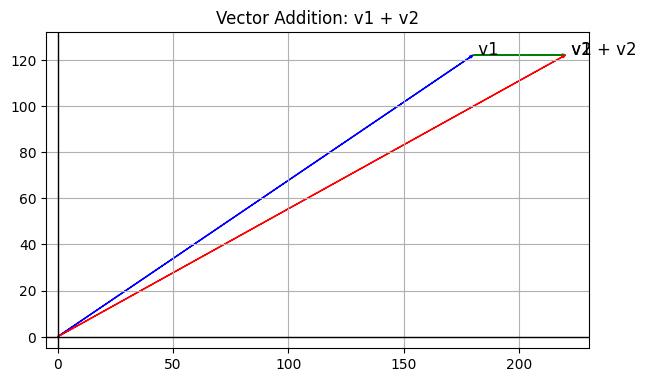

In [36]:
import numpy as np
import matplotlib.pyplot as plt

w1_t = 0.25
w2_t = 0.5

# --- Define your vectors ---
v1 = np.array([180, 122])
v2 = np.array([40, 0])

# Vector sum
v_sum = v1 + v2

# --- Compute points ---
origin = np.array([0, 0])
v1_end = v1
v2_end = v1 + v2   # v2 starts at the end of v1

# --- Plot ---
plt.figure(figsize=(7,7))

# Vector 1 (from origin)
plt.arrow(0, 0, v1[0], v1[1],
          head_width=1, length_includes_head=True, color='blue')
plt.text(v1[0], v1[1], " v1", fontsize=12)

# Vector 2 (starting at v1_end)
plt.arrow(v1_end[0], v1_end[1], v2[0], v2[1],
          head_width=1, length_includes_head=True, color='green')
plt.text(v2_end[0], v2_end[1], " v2", fontsize=12)

# Vector sum (from origin)
plt.arrow(0, 0, v_sum[0], v_sum[1],
          head_width=1, length_includes_head=True, color='red')
plt.text(v_sum[0], v_sum[1], " v1 + v2", fontsize=12)

# Formatting
plt.axhline(0, color='black', linewidth=1)
plt.axvline(0, color='black', linewidth=1)
plt.grid(True)
plt.xlim(-5, max(v_sum[0], v1_end[0]) + 10)
plt.ylim(-5, max(v_sum[1], v1_end[1]) + 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Vector Addition: v1 + v2")
plt.show()


In [37]:
# Scalar (non-vectorized) gradient descent
w1 = 0.0
w2 = 0.0
b  = 0.0
lr = 1e-7
n = len(y)

for epoch in range(20000):
    y_hat = w1*x1 + w2*x2 + b
    error = y_hat - y.flatten()

    dw1 = (2/n) * np.sum(error * x1)
    dw2 = (2/n) * np.sum(error * x2)
    db  = (2/n) * np.sum(error)

    w1 -= lr * dw1
    w2 -= lr * dw2
    b  -= lr * db

print(f"wieght 1 : {w1}")
print(f"wieght 2 : {w2}")
print(f"bias : {b}")

wieght 1 : 0.7737993926544017
wieght 2 : 0.013236861842878735
bias : -0.00444138868887303


# Vectorized Gradient Descent (Neural‑Network Style)
**Updates all weights at once**

In [5]:
# Vectorized gradient descent
X = np.column_stack([x1, x2])   # (n × 2)
y = y.reshape(-1, 1)            # (n × 1)

w = np.zeros((2, 1))            # (2 × 1)
b = 0.0

lr = 1e-7
n = len(y)

for epoch in range(20000):
    y_hat = X @ w + b           # (n×2)(2×1) → (n×1)
    error = y_hat - y           # (n×1)

    dw = (2/n) * (X.T @ error)  # (2×n)(n×1) → (2×1)
    db = (2/n) * np.sum(error)  # scalar

    w -= lr * dw
    b -= lr * db

print(f"wieght : {w}")
print(f"bias : {b}")

wieght : [[0.77379939]
 [0.01323686]]
bias : -0.004441388688873026


One forward pass using a dot product

One gradient vector

One update rule

This is literally how neural networks train
The vectorized version is a neural network layer.

Inputs → dot product → bias → output → gradient → update.

The only difference between this and a transformer is:

more weights

more layers

nonlinear activations

This is the moment where this naturally transitions into logistic regression, XOR, and backprop.
